In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import animation
import numpy as np

In [2]:
leagues = os.listdir("Data")

In [3]:
seasons = os.listdir(os.path.join("Data",leagues[0]))

In [4]:
tables = os.listdir(os.path.join(*["Data", leagues[0], seasons[0]]))

In [5]:
Defense = 'stage-team-stats-defensive.csv'
Attack_side = 'stage-touch-channels.csv'
Action_zone = 'stage_touch_zones.csv'

In [6]:
ats_df = pd.read_csv(os.path.join(*['Data', leagues[0],seasons[0],Attack_side]))

attrs = list(ats_df.columns)
attrs.remove('Team')
attrs.remove('R')

In [7]:
ats_avg_stats = {}

for league in leagues:
    ats_df = pd.read_csv(os.path.join(*['Data', leagues[0],seasons[0],Attack_side]))

    attrs = list(ats_df.columns)
    attrs.remove('Team')
    attrs.remove('R')

    for attr in attrs:
        ats_df[attr] = ats_df[attr].map(lambda x: round(float(str(x)[:-1])/100,2))

    ats_avg_df = pd.DataFrame(ats_df[attrs].mean(axis =0)).T

    ats_avg_df['season']= '2009_2010'


    for season in seasons[1:]:
        ats_df = pd.read_csv(os.path.join(*['Data', leagues[1],season,Attack_side]))
        for attr in attrs:
            ats_df[attr] = ats_df[attr].map(lambda x: round(float(str(x)[:-1])/100,2))
        ats_avg_df2 = pd.DataFrame(ats_df[attrs].mean(axis =0)).T
        ats_avg_df2['season'] = season
        ats_avg_df = pd.concat([ats_avg_df, ats_avg_df2], ignore_index = True)

    ats_avg_df["Sides"] = ats_avg_df["Left Side"] + ats_avg_df["Right Side"]
    
    ats_avg_stats[league] = ats_avg_df

In [8]:
# Place holder for showing each league if needed 

In [9]:
ats_avg_stats_all = ats_avg_stats[leagues[0]]
season = ats_avg_stats_all['season']
ats_avg_stats_all.drop(columns = ['season'], inplace = True)
for i in range(1,len(leagues)):
    ats_avg_stats_all = ats_avg_stats_all.add(ats_avg_stats[leagues[i]].drop(columns = ['season']))        
ats_avg_stats_all['season'] = season
figure(figsize=(14, 8))

ats_avg_stats_all[attrs] = ats_avg_stats_all[attrs]/ len(leagues)

<Figure size 1008x576 with 0 Axes>

In [10]:
# from matplotlib import gridspec

<IPython.core.display.Javascript object>


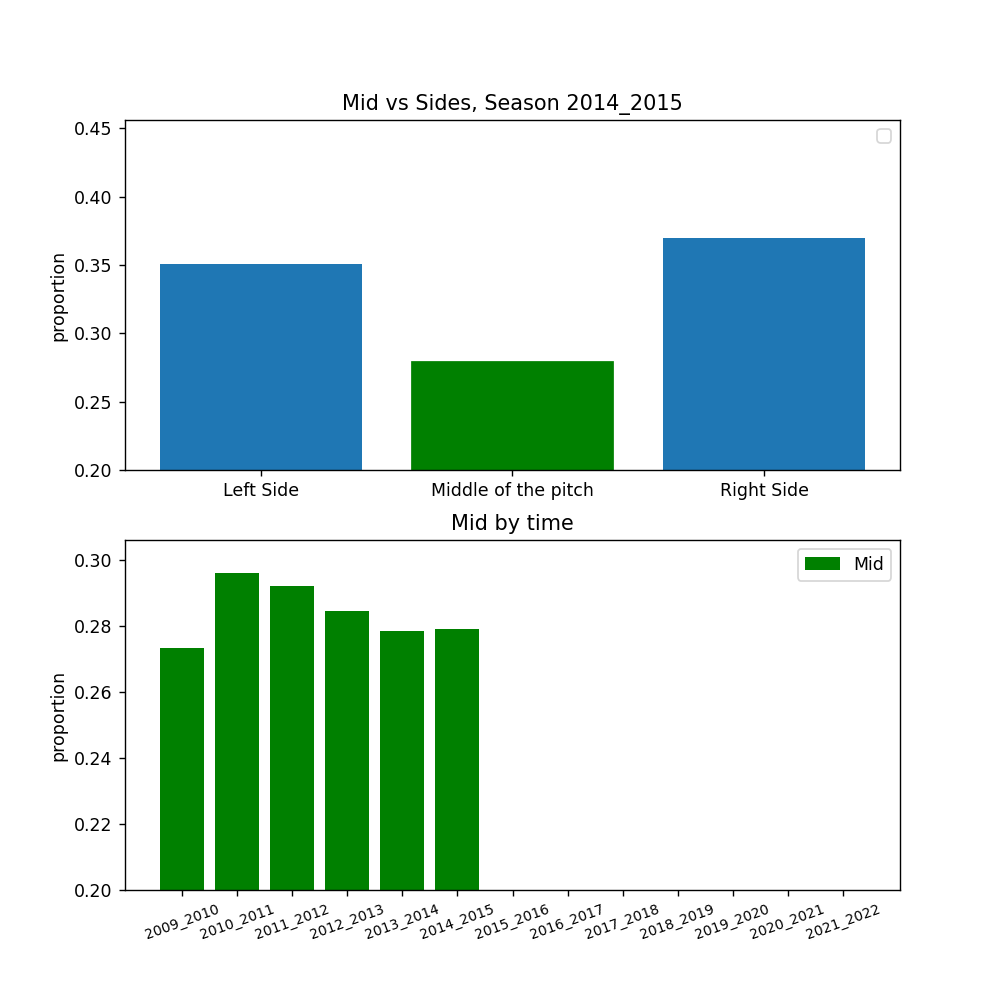

In [11]:
%matplotlib notebook

fig, (ax1,ax2) = plt.subplots(2, 1, figsize = (8, 8))

x = ["Left Side", "Middle of the pitch", "Right Side"]
def barlist(i): 
    return ats_avg_stats_all.loc[[i]].values.tolist()[0][:-2]


labels = ats_avg_stats_all['season'].tolist()
mid = ats_avg_stats_all["Middle of the pitch"].tolist()
sides = ats_avg_stats_all["Sides"].tolist()

roof = max(mid) +0.01
ax1.set_ylim(0.2,roof+0.15)
ax1.set_ylabel('proportion')

ax1.set_title('Mid vs Sides, Season ')
# ax1.legend()
bars = ax1.bar(x,barlist(0))
bars[1].set_color('g')

ax2.set_ylim(0.2,roof) # fix the y axis
ax2.bar(labels, [0]*(len(seasons)), label='Mid', color = 'g')
for label in ax2.get_xticklabels(): 
    label.set_rotation(22)
ax2.set_ylabel('proportion')
ax2.set_title('Mid vs Sides')
ax2.legend()

def animate(i):
    ax1.cla()  # clear the previous image  
    ax1.set_ylim(0.2,roof+0.15)
    ax1.set_ylabel('proportion')

    ax1.set_title('Mid vs Sides, Season '+str(seasons[i]))
    ax1.legend()
    bars = ax1.bar(x,barlist(i))
    bars[1].set_color('g')

    ax2.cla()
    ax2.set_ylim(0.2,roof) # fix the y axis
    ax2.bar(labels, mid[:i+1]+[0]*(len(seasons)-i-1), label='Mid', color = 'g')
#     ax2.bar(labels, sides[:i]+[0]*(len(seasons)-i), bottom=mid,
#            label='Sides')

    ax2.tick_params(axis='x', labelsize= 8, rotation = 20)
    ax2.set_ylabel('proportion')
    ax2.set_title('Mid by time')

    ax2.legend()

anim = animation.FuncAnimation(fig, animate,repeat = True, frames = len(seasons)+1, interval = 400, blit = True)
plt.show()